In [286]:
import pandas as pd
import matplotlib.pyplot as plt


In [287]:
# сортировка пузырьком
def bubble_sort(arr, key_index, b=True):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if (arr[j][key_index] < arr[j+1][key_index] and b) or (arr[j][key_index] > arr[j+1][key_index] and not b):
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [288]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTable:
    def __init__(self):
        self.capacity = 10 
        self.size = 0 
        self.buckets = [None] * self.capacity 

    def add(self, key, value): #добавить в таблицу
        index = hash(key) % self.capacity
        node = self.buckets[index] 
        while node:
            if node.key == key: 
                node.value = value
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        if self.size > 0.7 * self.capacity:
            self.resize()
  
    def get(self, key): #получить значение
        index = hash(key) % self.capacity 
        node = self.buckets[index] 
        while node: 
            if node.key == key: 
                return node.value
            node = node.next
        return None

    def remove(self, key): #удалить
        index = hash(key) % self.capacity 
        node = self.buckets[index] 
        prev = None
        while node: 
            if node.key == key: 
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next
  
    def resize(self): #изменить емкость
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity 
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

    def keys(self):
        keys_list = []
        for bucket in self.buckets:
            node = bucket
            while node:
                keys_list.append(node.key)
                node = node.next
        return keys_list

    def items(self):
        items_list = []
        for bucket in self.buckets:
            node = bucket
            while node:
                items_list.append((node.key, node.value))
                node = node.next
        return items_list

    def values(self):
        values_list = []
        for bucket in self.buckets:
            node = bucket
            while node:
                values_list.append(node.value)
                node = node.next
        return values_list


ОБЩАЯ ВЫРУЧКА МАГАЗИНА СОСТАВИЛА: 18185.00 рублей
ТОВАР, ПРОДАННЫЙ НАИБОЛЬШЕЕ КОЛИЧЕСТВО РАЗ: Гречка была продана 12 раз
ТОВАР, ПРИНЕСШИЙ НАИБОЛЬШУЮ ВЫРУЧКУ: Свинина (3600.0 рублей)

Проданные в килограммах товары и их процентное число от общей выручки:

Гречка: 12 кг, 4.6%

Персики: 11 кг, 16.3%

Свинина: 9 кг, 19.8%

Апельсины: 9 кг, 4.7%

Рис: 8 кг, 4.0%

Помидоры: 7 кг, 9.6%

Лук: 5 кг, 2.1%

Пшено: 5 кг, 1.9%

Морковь: 5 кг, 1.1%

Булгур: 4 кг, 2.2%

Огурцы: 4 кг, 3.1%

Курица: 3 кг, 6.6%

Яблоки: 3 кг, 2.0%

Баранина: 2 кг, 11.0%

Говядина: 2 кг, 7.7%

Виноград: 2 кг, 3.3%


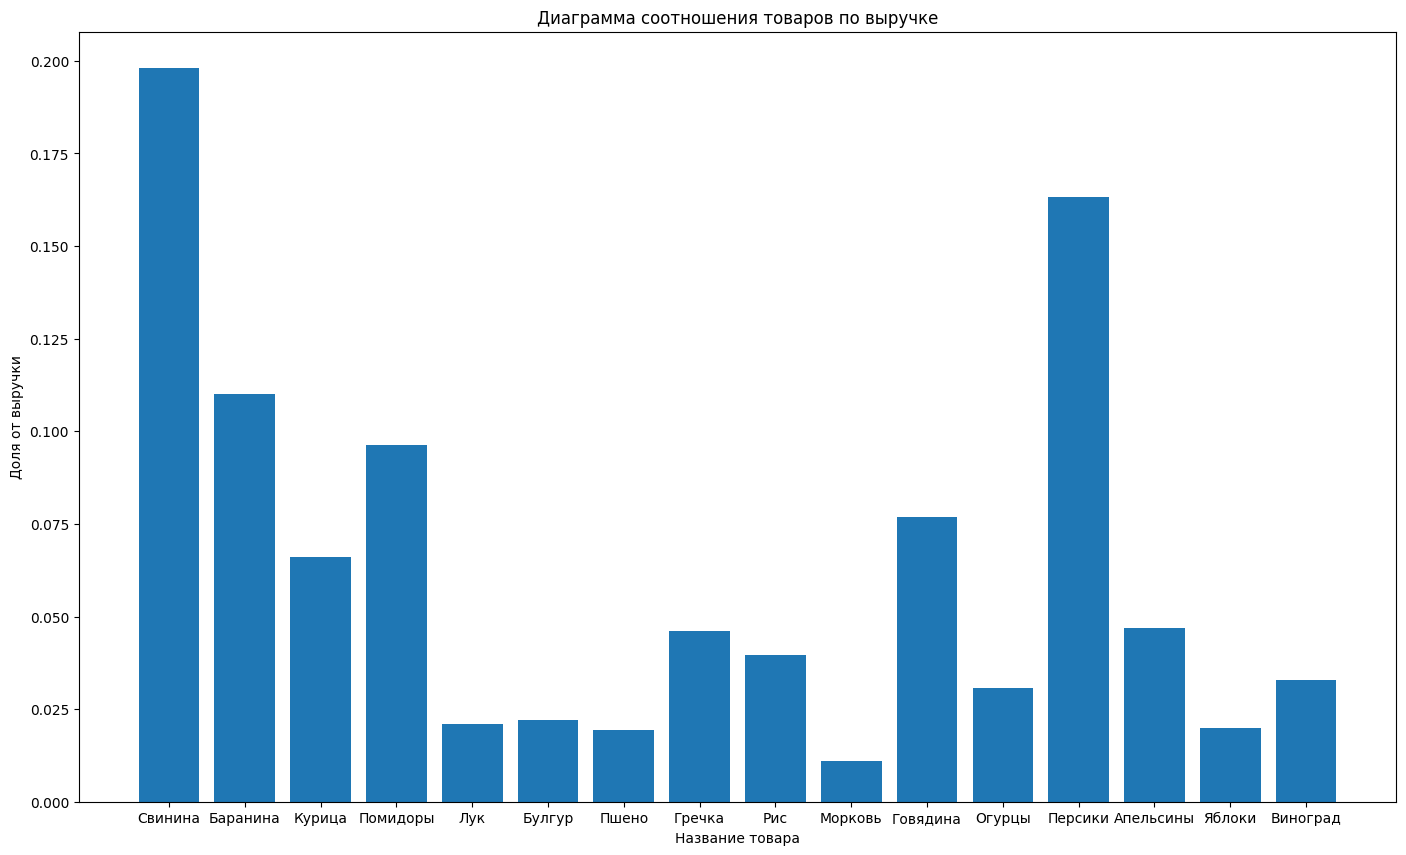

In [289]:
file_path = 'prod.csv' 
def readProdArr(file_path): #прочитать данные из файла
    prodArr = []
    mostSoldProd = 0
    mostRevenueProd = 0
    try:
        with open(file_path, mode='r', encoding='utf-8') as f:
            f_reader = csv.DictReader(f)
            for row in f_reader:
                prodArr.append(row)
    except IOError as e:
        print(f"Error reading file {file_path}: {e}")
    return prodArr
    
def records(prodArr): #нахождение необходимых записей
    total = sum(float(row['Общая стоимость']) for row in prodArr)
    prodSold = HashTable()
    prodRevenue = HashTable()

    for row in prodArr:
        prodName = row['Название товара']
        soldCount = int(row['Количество продаж'])
        prodSold.add(prodName, soldCount)
        revenue = float(row['Общая стоимость'])
        prodRevenue.add(prodName, revenue)

    prodRevenueShare = {product: prodRevenue.get(product) / total for product in prodRevenue.keys()}
    
    prodSoldList = prodSold.items()
    sortSold = bubble_sort(prodSoldList, key_index=1)    
    prodRevenueList = prodRevenue.items()
    sortRevenue = bubble_sort(prodRevenueList, key_index=1)
    #нахождение максимумов
    mostSoldProd = sortSold[0]
    mostRevenueProd = sortRevenue[0]
    
    return total, prodSold, prodRevenue, prodRevenueShare, mostSoldProd, mostRevenueProd

prodArr = readProdArr(file_path)
total, prodSold, produRevenue, prodRevenueShare, mostSoldProd, mostRevenueProd = records(prodArr)

def sheet(total, prodSold, prodRevenueShare, mostSoldProd, mostRevenueProd):
    print(f"ОБЩАЯ ВЫРУЧКА МАГАЗИНА СОСТАВИЛА: {total:.2f} рублей")
    print(f"ТОВАР, ПРОДАННЫЙ НАИБОЛЬШЕЕ КОЛИЧЕСТВО РАЗ: {mostSoldProd[0]} была продана {mostSoldProd[1]} раз")
    print(f"ТОВАР, ПРИНЕСШИЙ НАИБОЛЬШУЮ ВЫРУЧКУ: {mostRevenueProd[0]} ({mostRevenueProd[1]:.1f} рублей)")
    print("\nПроданные в килограммах товары и их процентное число от общей выручки:")
    data = [
        (product, prodSold.get(product), prodRevenueShare.get(product))
        for product in prodSold.keys()
    ]
    #сортировка по кол-ву продаж
    data.sort(key=lambda x: x[1], reverse=True)

    for product, sales, share in data:
        print(f"\n{product}: {sales} кг, {share:.1%}")
sheet(total, prodSold, prodRevenueShare, mostSoldProd, mostRevenueProd)

def barСhart(prodRevenueShare):
    labels = prodRevenueShare.keys()
    values = prodRevenueShare.values()
    plt.figure(figsize=(17, 10))
    plt.bar(labels, values)
    plt.title('Диаграмма соотношения товаров по выручке')
    plt.xlabel('Название товара')
    plt.ylabel('Доля от выручки')
    plt.show()
barСhart(prodRevenueShare)